In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/base_line.xlsx', header=0)
else:
    print('Not running on CoLab')
    df = pd.read_excel('c:/bc/base_line.xlsx', header=0)

Not running on CoLab


In [3]:
del_idx = df[df['total_price'] == 50000].index
df = df.drop(del_idx)

In [4]:
data=df

In [5]:
#판다스 지수 표현 바꾸기
pd.options.display.float_format = '{:.5f}'.format

# 속옷

In [6]:
속옷_data=data[data['p_group'] == '속옷']
의류_data=data[data['p_group'] == '의류']

In [7]:
# total_price = 0 제거

속옷_data=속옷_data[속옷_data.total_price.notnull()]
의류_data=의류_data[의류_data.total_price.notnull()]

In [8]:
del 속옷_data['Unnamed: 0']

In [9]:
속옷_data_grouped = 속옷_data.groupby('broadcast').max()

In [10]:
속옷_상품개수 = np.unique(속옷_data_grouped['p_code']) #180
속옷_브랜드개수 = np.unique(속옷_data_grouped['m_code']) # 86
len(속옷_브랜드개수)

86

In [11]:
# 상품명 분석

In [12]:
underwear_data = 속옷_data.loc[:, ['m_code', 'p_name', 'total_price', 'sales']]
p_name = underwear_data['p_name']
p_name

6                 오모떼 레이스 파운데이션 브라
7                 오모떼 레이스 파운데이션 브라
8                 오모떼 레이스 파운데이션 브라
18       크로커다일 The 편안한 코튼 브라팬티 4세트
19       크로커다일 The 편안한 코튼 브라팬티 4세트
                   ...            
37271            푸마 시그니처 코튼 트렁크 9종
37272                 푸마 코튼 언더탑 9종
37279         루시헨느 레이스 홀리데이 란쥬 패키지
37280         루시헨느 레이스 홀리데이 란쥬 패키지
37281         루시헨느 레이스 홀리데이 란쥬 패키지
Name: p_name, Length: 3910, dtype: object

In [13]:
import re

In [14]:
brand_name_list = []
for name in p_name:
    brand_name = name.split(' ')[0]
    brand_name = re.sub('(\(ARS10%\))|(\(무이자\))|(\(세일20%\))|(\(일시불\))|(\[라쉬반\］)|(\[완벽더블\])|(초특가\))', '', brand_name)
    brand_name_list.append(brand_name)

In [15]:
np.unique(brand_name_list)

array(['BBC&IZUMI', 'FC바로셀로나', 'LSX라이크라', '남영비비안', '댄스킨', '라쉬반', '란체티',
       '레이프릴', '로베르타', '루시헨느', '리복', '몬테밀라노', '발레리', '벨레즈온', '뷰티플렉스',
       '실크트리', '실크플러스', '아키', '에버라스트', '오가닉뷰티', '오렐리안', '오모떼', '저스트마이사이즈',
       '카파', '컬럼비아', '코몽트', '쿠미투니카', '크로커다일', '푸마', '헤드', '헤스떼벨', '히트융'],
      dtype='<U9')

In [16]:
len(np.unique(brand_name_list)) #33개 브랜드

32

In [17]:
속옷_data['brand_name'] = brand_name_list
underwear_data['brand_name'] = brand_name_list

In [18]:
temp =underwear_data.groupby('brand_name').sum().sort_values('total_price', ascending=False) #취급액 큰 순서대로 브랜드 순위

In [19]:
속옷_data_grouped = 속옷_data.groupby('broadcast').max()

In [20]:
# 방송횟수, 방송_1회당_취급액 columns 추가
temp['count'] = 속옷_data_grouped['brand_name'].value_counts()
temp['방송_1회당_취급액'] = np.round(temp['total_price'] / temp['count'], 0)

In [21]:
temp

,m_code,total_price,sales,count,방송_1회당_취급액
brand_name,,,,,
푸마,101917849,21742179000,254461,565,38481733.00000
오모떼,27282951,12217014000,137578,272,44915493.00000
아키,18114454,9239067000,99612,181,51044569.00000
레이프릴,20639788,6017753000,119389,206,29212393.00000
쿠미투니카,18111490,5920614000,94459,180,32892300.00000
에버라스트,26373897,4744301000,118907,260,18247312.00000
로베르타,12992634,4500314000,50646,129,34886155.00000
헤드,21330391,4211913000,63704,129,32650488.00000
카파,17102743,3656657000,52728,96,38090177.00000


Text(0.5, 1.0, '브랜드별_취급액(합계)')

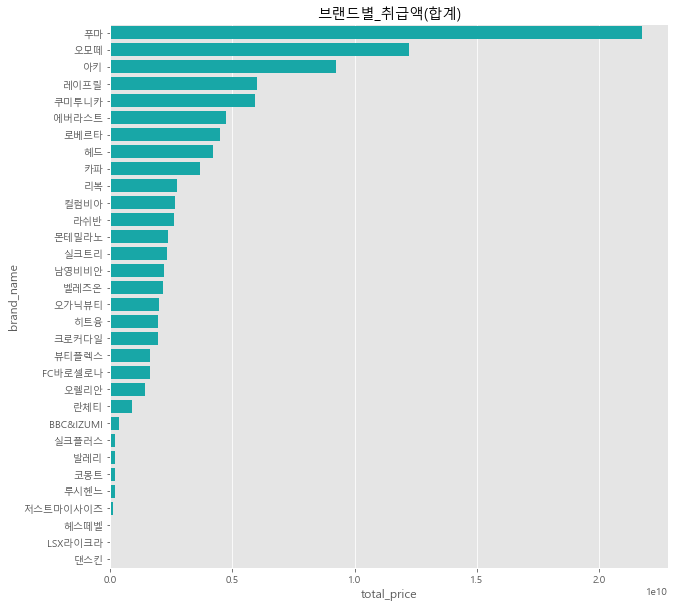

In [22]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=temp.index, x=temp['total_price'], data=temp, color="c")
plt.title("브랜드별_취급액(합계)")

Text(0.5, 1.0, '방송_1회당_취급액')

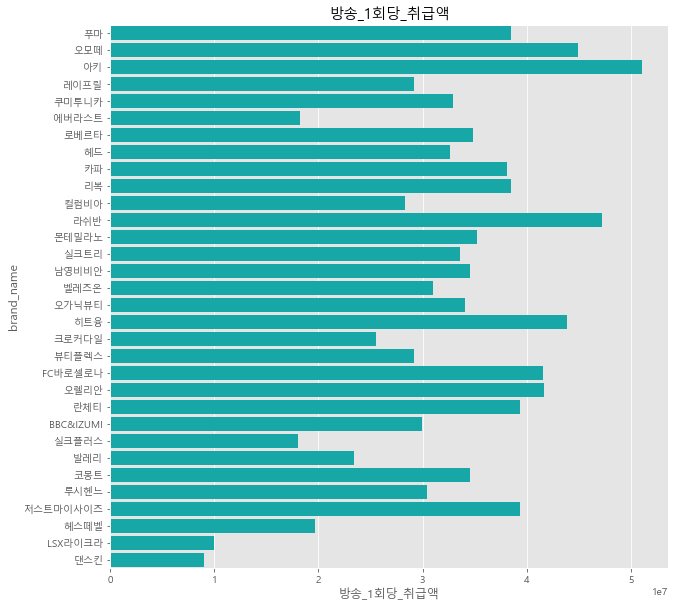

In [24]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=temp.index, x=temp['방송_1회당_취급액'], data=temp, color="c")
plt.title("방송_1회당_취급액")

# Top sales

In [25]:
sales = 속옷_data.sort_values('sales', ascending=False)[['broadcast', 'exp_min', 'm_code', 'p_name', 'total_price', 'sales', 'brand_name' ]]

In [26]:
sales[:30].value_counts('brand_name')

brand_name
벨레즈온     7
레이프릴     7
뷰티플렉스    4
실크트리     3
쿠미투니카    2
오모떼      2
히트융      1
푸마       1
아키       1
몬테밀라노    1
란체티      1
dtype: int64

In [27]:
벨레즈온 = 속옷_data[속옷_data['brand_name'] == '벨레즈온']
벨레즈온

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,...,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME,DAY_NUM,code,temp,no,brand_name
12475,2019-05-01 01:00:00,20.00000,100348,201090,벨레즈온 브라캡 심리스 원피스 패키지,속옷,49900,16511000,331,2019,...,1,0,0,2019-05-01,Wednesday,3,247,2479,12475,벨레즈온
12476,2019-05-01 01:20:00,20.00000,100348,201090,벨레즈온 브라캡 심리스 원피스 패키지,속옷,49900,20804000,417,2019,...,1,20,0,2019-05-01,Wednesday,3,247,2479,12476,벨레즈온
12477,2019-05-01 01:40:00,12.00000,100348,201090,벨레즈온 브라캡 심리스 원피스 패키지,속옷,49900,19181000,384,2019,...,1,40,0,2019-05-01,Wednesday,3,247,2479,12477,벨레즈온
13038,2019-05-06 14:00:00,20.00000,100348,201090,벨레즈온 브라캡 심리스 원피스 패키지,속옷,49900,32058000,642,2019,...,14,0,0,2019-05-06,Monday,1,247,2562,13038,벨레즈온
13039,2019-05-06 14:20:00,20.00000,100348,201090,벨레즈온 브라캡 심리스 원피스 패키지,속옷,49900,43595000,874,2019,...,14,20,0,2019-05-06,Monday,1,247,2562,13039,벨레즈온
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24797,2019-08-25 07:20:00,20.00000,100348,201089,벨레즈온 브라캡 심리스 원피스 패키지,속옷,29900,36102000,1207,2019,...,7,20,0,2019-08-25,Sunday,7,247,4730,24797,벨레즈온
24798,2019-08-25 07:40:00,20.00000,100348,201089,벨레즈온 브라캡 심리스 원피스 패키지,속옷,29900,52403000,1753,2019,...,7,40,0,2019-08-25,Sunday,7,247,4730,24798,벨레즈온
25089,2019-08-28 08:00:00,20.00000,100348,201089,벨레즈온 브라캡 심리스 원피스 패키지,속옷,29900,14582000,488,2019,...,8,0,0,2019-08-28,Wednesday,3,247,4794,25089,벨레즈온
25090,2019-08-28 08:20:00,20.00000,100348,201089,벨레즈온 브라캡 심리스 원피스 패키지,속옷,29900,23365000,781,2019,...,8,20,0,2019-08-28,Wednesday,3,247,4794,25090,벨레즈온


In [28]:
np.unique(벨레즈온['p_name'])

array(['벨레즈온 브라캡 심리스 원피스 패키지'], dtype=object)

In [29]:
#월

In [30]:
벨레즈온.value_counts('MONTH')

MONTH
8    31
5    18
6    12
7     9
dtype: int64

In [31]:
a = 벨레즈온.groupby('MONTH').sum()

Text(0.5, 1.0, '벨레즈온 브라캡 심리스 원피스 패키지(합계)')

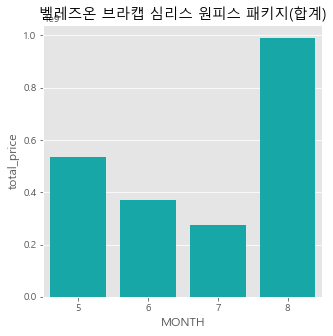

In [32]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y=a['total_price'], x=a.index, color="c")
plt.title("벨레즈온 브라캡 심리스 원피스 패키지(합계)")

In [33]:
#시간 (12~2시 판매가 많음)

In [34]:
벨레즈온.value_counts('HOUR')

HOUR
14    12
13    12
1     10
11     9
12     6
18     3
15     3
10     3
9      3
8      3
7      3
6      3
dtype: int64

In [35]:
b = 벨레즈온.groupby('HOUR').sum()
b

,exp_min,m_code,p_code,unit_price,total_price,sales,YEAR,MONTH,DAY,MINUTE,SECOND,DAY_NUM,code,temp,no
HOUR,,,,,,,,,,,,,,,
1,177.50000,1003480,2010893,359000,180515000,5280,20190,71,50,240,0,42,2470,38127,198307
6,60.00000,301044,603267,89700,66424000,2222,6057,24,18,60,0,6,741,13053,68442
7,60.00000,301044,603267,89700,107799000,3605,6057,24,75,60,0,21,741,14190,74391
8,60.00000,301044,603267,89700,65400000,2187,6057,24,84,60,0,9,741,14382,75270
9,60.00000,301044,603267,89700,100756000,3371,6057,24,66,60,0,12,741,14007,73590
10,60.00000,301044,603270,149700,86872000,1741,6057,18,15,60,0,9,741,9405,49050
11,180.00000,903132,1809801,359100,399657000,11593,18171,63,81,180,0,21,2223,34284,179367
12,108.85000,602088,1206531,209400,122763000,3424,12114,45,63,120,0,30,1482,24831,129972
13,240.00000,1204176,2413071,508800,383456000,9705,24228,72,222,240,0,48,2964,40833,212127


Text(0.5, 1.0, '벨레즈온 브라캡 심리스 원피스 패키지(합계)')

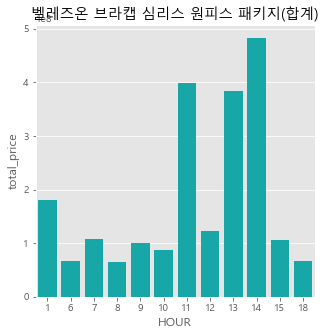

In [36]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y=b['total_price'], x=b.index, color="c")
plt.title("벨레즈온 브라캡 심리스 원피스 패키지(합계)")

# Top total price

In [37]:
prices = 속옷_data.sort_values('total_price', ascending=False)[['broadcast', 'exp_min', 'm_code', 'p_name', 'total_price', 'sales', 'brand_name' ]]

In [38]:
prices

,broadcast,exp_min,m_code,p_name,total_price,sales,brand_name
16749,2019-06-08 22:50:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),153959000,1541,아키
35008,2019-12-07 11:00:00,20.00000,100288,히트융 극세사 퍼융기모 남성 동내의 패키지,153084000,2190,히트융
14981,2019-05-22 21:30:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),146800000,1469,아키
13427,2019-05-09 21:30:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),143580000,1437,아키
15714,2019-05-29 22:30:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),142696000,1428,아키
...,...,...,...,...,...,...,...
37023,2019-12-27 18:20:00,nan,100610,푸마 코튼 언더탑 9종,420000,5,푸마
28191,2019-09-27 19:00:00,nan,100610,푸마 코튼 언더탑 9종,412000,5,푸마
407,2019-01-05 20:00:00,nan,100610,푸마 NEW 트렁크 패키지,393000,4,푸마
4279,2019-02-14 01:00:00,nan,100597,컬럼비아 옴니위크 머슬 언더셔츠 6종,368000,5,컬럼비아


In [39]:
prices[:30]

,broadcast,exp_min,m_code,p_name,total_price,sales,brand_name
16749,2019-06-08 22:50:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),153959000,1541,아키
35008,2019-12-07 11:00:00,20.00000,100288,히트융 극세사 퍼융기모 남성 동내의 패키지,153084000,2190,히트융
14981,2019-05-22 21:30:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),146800000,1469,아키
13427,2019-05-09 21:30:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),143580000,1437,아키
15714,2019-05-29 22:30:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),142696000,1428,아키
12429,2019-05-01 20:30:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),142308000,1425,아키
16793,2019-06-09 13:30:00,30.00000,100305,오모떼 프런트후크 프레쉬 데오브라 시즌4,129431000,931,오모떼
17721,2019-06-17 22:40:00,20.00000,100080,아키 풀커버 라이크라 레이스 패키지(106차)(랜덤2세트추가),127146000,1414,아키
18217,2019-06-23 15:30:00,30.00000,100305,오모떼 프런트후크 프레쉬 데오브라 시즌4,127025000,914,오모떼
14610,2019-05-19 20:50:00,30.00000,100079,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),125412000,1255,아키


In [40]:
prices[:30].value_counts('brand_name')

brand_name
아키         11
푸마          6
오모떼         5
로베르타        3
FC바로셀로나     2
히트융         1
쿠미투니카       1
레이프릴        1
dtype: int64

In [41]:
#아키

In [42]:
아키_data = 속옷_data[속옷_data['p_name'] == '아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차)']
아키_data.sort_values('total_price', ascending=False)

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,...,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME,DAY_NUM,code,temp,no,brand_name
16749,2019-06-08 22:50:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,153959000,1541,2019,...,22,50,0,2019-06-08,Saturday,6,244,3205,16749,아키
14981,2019-05-22 21:30:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,146800000,1469,2019,...,21,30,0,2019-05-22,Wednesday,3,244,2877,14981,아키
13427,2019-05-09 21:30:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,143580000,1437,2019,...,21,30,0,2019-05-09,Thursday,4,244,2629,13427,아키
15714,2019-05-29 22:30:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,142696000,1428,2019,...,22,30,0,2019-05-29,Wednesday,3,244,3015,15714,아키
12429,2019-05-01 20:30:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,142308000,1425,2019,...,20,30,0,2019-05-01,Wednesday,3,244,2474,12429,아키
14610,2019-05-19 20:50:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,125412000,1255,2019,...,20,50,0,2019-05-19,Sunday,7,244,2816,14610,아키
16476,2019-06-06 11:30:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,118146000,1183,2019,...,11,30,0,2019-06-06,Thursday,4,244,3155,16476,아키
15181,2019-05-24 20:30:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,117916000,1180,2019,...,20,30,0,2019-05-24,Friday,5,244,2915,15181,아키
15249,2019-05-25 11:30:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,116117000,1162,2019,...,11,30,0,2019-05-25,Saturday,6,244,2926,15249,아키
19124,2019-07-02 22:30:00,30.00000,100079,200215,아키 라이크라 노와이어 브라 컬렉션(뉴아키 23차),속옷,99900,112391000,1125,2019,...,22,30,0,2019-07-02,Tuesday,2,244,3675,19124,아키


In [43]:
# 월 (5-6월)

In [44]:
아키_data.value_counts('MONTH')

MONTH
5    32
6    14
7     4
4     4
dtype: int64

In [45]:
# 시간

In [46]:
아키_data.value_counts('HOUR')

HOUR
14    10
23     6
22     6
20     6
11     6
10     6
21     4
0      4
13     2
9      2
7      2
dtype: int64

# 의류

In [47]:
의류_data_grouped = 의류_data.groupby('broadcast').max()

In [48]:
의류_상품개수 = np.unique(의류_data_grouped['p_code']) #265
의류_브랜드개수 = np.unique(의류_data_grouped['m_code']) #119

In [49]:
len(의류_브랜드개수)

119

In [50]:
del 의류_data['Unnamed: 0']

In [51]:
clothing_data = 의류_data.loc[:, ['m_code', 'p_name', 'total_price', 'sales']]
p_name = clothing_data['p_name']
p_name

0                 테이트 남성 셀린니트3종
1                 테이트 여성 셀린니트3종
2                 테이트 남성 셀린니트3종
3                 테이트 여성 셀린니트3종
4                 테이트 남성 셀린니트3종
                  ...          
37298    [헤스티지] 레나 폭스퍼후드 덕다운롱코트
37299    [헤스티지] 레나 폭스퍼후드 덕다운롱코트
37330           마르엘라로사티 에코무스탕1종
37331           마르엘라로사티 에코무스탕1종
37332           마르엘라로사티 에코무스탕1종
Name: p_name, Length: 4331, dtype: object

In [52]:
brand_name_list = []
for name in p_name:
    brand_name = re.sub('(화이트라벨)|(19 SS)|([0-9])|([\[\]]|(F/W)|(FW))', '', str(name))
    brand_name = brand_name.strip()
    brand_name = brand_name.split(' ')[0]
    brand_name_list.append(brand_name)

In [53]:
np.unique(brand_name_list) # 브랜드 50개

array(['CERINI', 'EXR', 'K-SWISS', 'NNF', 'USPA', '그렉노먼', '대동모피', '더블유베일',
       '도네이', '디베이지', '디즈니', '디키즈', '라라쎄', '레드캠프', '로이몬스터', '루이바셋', '르까프',
       '릴리젼', '마담팰리스', '마르엘라로사티', '마리노블', '마모트', '메시제이', '메이듀', '뱅뱅',
       '보코', '스텔라테일러', '스튜디오럭스', '아리스토우', '아문센', '아주아', '알렉스하운드', '어반시크릿',
       '에르나벨', '엔셀라두스', '오렐리안', '유리진', '이동수골프', '임페리얼', '젠트웰', '코몽트',
       '코펜하겐럭스', '크리스티나앤코', '타운젠트', '테이트', '팜스프링스', '페플럼제이', '헤비추얼',
       '헤스티지'], dtype='<U7')

In [54]:
의류_data['brand_name'] = brand_name_list
clothing_data['brand_name'] = brand_name_list

In [55]:
의류_data_grouped = 의류_data.groupby('broadcast').max()

In [56]:
temp =clothing_data.groupby('brand_name').sum().sort_values('total_price', ascending=False) #취급액 큰 순서대로 브랜드 순위

In [57]:
# 방송횟수, 방송_1회당_취급액 columns 추가
temp['count'] = 의류_data_grouped['brand_name'].value_counts()
temp['방송_1회당_취급액'] = np.round(temp['total_price'] / temp['count'], 0)

In [58]:
temp

,m_code,total_price,sales,count,방송_1회당_취급액
brand_name,,,,,
마르엘라로사티,26994937,9584930000,69102,269,35631710.00000
K-SWISS,44110032,9472444000,133848,221,42861738.00000
CERINI,24395716,8865406000,141076,242,36633909.00000
헤스티지,28075934,8475978000,43098,205,41346234.00000
NNF,24711553,7628385000,212228,240,31784938.00000
뱅뱅,41353083,7017356000,95355,208,33737288.00000
코몽트,13054177,6176979000,152123,130,47515223.00000
보코,20163314,5193798000,97452,200,25968990.00000
크리스티나앤코,16776684,4503162000,114174,167,26965042.00000


Text(0.5, 1.0, '브랜드별_취급액(합계)')

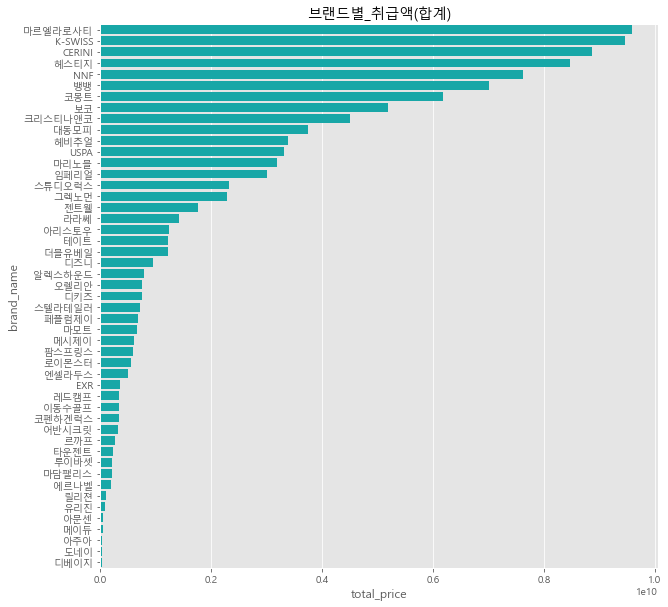

In [59]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=temp.index, x=temp['total_price'], data=temp, color="c")
plt.title("브랜드별_취급액(합계)")

Text(0.5, 1.0, '방송_1회당_취급액')

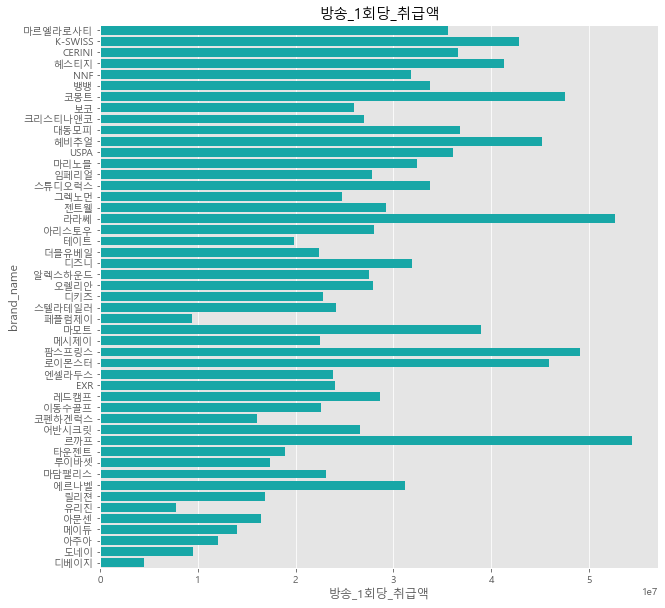

In [60]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=temp.index, x=temp['방송_1회당_취급액'], data=temp, color="c")
plt.title("방송_1회당_취급액")

In [61]:
#르까프 남성 핫멜트 덕다운 트랙 3종+르까프 여성 핫멜트 덕다운 트랙 3종
#라라쎄 쉬폰 롤업재킷 2종 세트

#팜스프링스 19 SS 남성 여름 쿨팬츠 4종 + 팜스프링스 19 SS 여성 여름 쿨팬츠 4종
#팜스프링스 남성 패딩팬츠 3종 + 팜스프링스 여성 패딩팬츠 3종

# Top sales

In [62]:
sales = 의류_data.sort_values('sales', ascending=False)[['broadcast', 'exp_min', 'm_code', 'p_name', 'total_price', 'sales', 'brand_name' ]]

In [63]:
sales[:20]

,broadcast,exp_min,m_code,p_name,total_price,sales,brand_name
34988,2019-12-06 01:40:00,17.16667,100418,코몽트 덤블 플리스 자켓 2종,322009000,8070,코몽트
36488,2019-12-21 17:40:00,20.00000,100418,코몽트 덤블 플리스 자켓 2종,223492000,5601,코몽트
35458,2019-12-10 00:00:00,20.00000,100418,코몽트 덤블 플리스 자켓 2종,187419000,4697,코몽트
35000,2019-12-07 09:00:00,20.00000,100418,코몽트 덤블 플리스 자켓 2종,128955000,3232,코몽트
14565,2019-05-19 09:20:00,20.00000,100416,코몽트 남성 이너티셔츠 7종,117121000,2935,코몽트
22489,2019-08-03 08:40:00,20.00000,100416,코몽트 남성 프린트티셔츠8종,107462000,2693,코몽트
23258,2019-08-10 13:20:00,20.00000,100822,보코 풍기인견 블라우스,102784000,2635,보코
34999,2019-12-07 08:40:00,20.00000,100418,코몽트 덤블 플리스 자켓 2종,104910000,2629,코몽트
14566,2019-05-19 09:40:00,20.00000,100416,코몽트 남성 이너티셔츠 7종,101624000,2547,코몽트
15924,2019-06-01 08:40:00,20.00000,100416,코몽트 남성 이너티셔츠 7종,96380000,2416,코몽트


In [64]:
sales[:30].value_counts('brand_name') #코몽트가 상위 9개 매출 차지하고 있음

brand_name
코몽트       16
NNF        8
보코         5
스튜디오럭스     1
dtype: int64

# 코몽트의 위력?

In [65]:
코몽트 = sales[sales['brand_name'] == '코몽트']

In [66]:
np.unique(코몽트['p_name'])

array(['코몽트 기모 터틀넥 5종', '코몽트 남성 메쉬티셔츠 7종', '코몽트 남성 이너티셔츠 7종',
       '코몽트 남성 이너티셔츠6종', '코몽트 남성 프린트티셔츠8종', '코몽트 남성스포츠 팬츠3종',
       '코몽트 덤블 플리스 자켓 2종', '코몽트 패딩 3종세트'], dtype=object)

In [67]:
플리스_data = 의류_data[의류_data['p_name'] == '코몽트 덤블 플리스 자켓 2종']
플리스_data.sort_values('sales', ascending=False)

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,...,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME,DAY_NUM,code,temp,no,brand_name
34988,2019-12-06 01:40:00,17.16667,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,322009000,8070,2019,...,1,40,0,2019-12-06,Friday,5,624,6695,34988,코몽트
36488,2019-12-21 17:40:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,223492000,5601,2019,...,17,40,0,2019-12-21,Saturday,6,624,6980,36488,코몽트
35458,2019-12-10 00:00:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,187419000,4697,2019,...,0,0,0,2019-12-10,Tuesday,2,624,6768,35458,코몽트
35000,2019-12-07 09:00:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,128955000,3232,2019,...,9,0,0,2019-12-07,Saturday,6,624,6698,35000,코몽트
34999,2019-12-07 08:40:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,104910000,2629,2019,...,8,40,0,2019-12-07,Saturday,6,624,6698,34999,코몽트
35931,2019-12-15 21:00:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,94103000,2358,2019,...,21,0,0,2019-12-15,Sunday,7,624,6858,35931,코몽트
35930,2019-12-15 20:40:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,72106000,1807,2019,...,20,40,0,2019-12-15,Sunday,7,624,6858,35930,코몽트
36524,2019-12-22 10:00:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,69815000,1750,2019,...,10,0,0,2019-12-22,Sunday,7,624,6988,36524,코몽트
36115,2019-12-17 20:00:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,67187000,1684,2019,...,20,0,0,2019-12-17,Tuesday,2,624,6900,36115,코몽트
36584,2019-12-22 00:00:00,20.00000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,65935000,1653,2019,...,0,0,0,2019-12-22,Sunday,7,624,7001,36584,코몽트


In [68]:
#월

In [69]:
플리스_data.value_counts('MONTH')

MONTH
12    34
11     3
dtype: int64

In [70]:
#시간

In [71]:
플리스_data.value_counts('HOUR')

HOUR
1     6
23    5
17    4
20    3
9     3
22    2
19    2
12    2
8     2
2     2
0     2
21    1
18    1
13    1
10    1
dtype: int64

Text(0.5, 1.0, '코몽트 덤블 플리스 자켓 2종 방송시간')

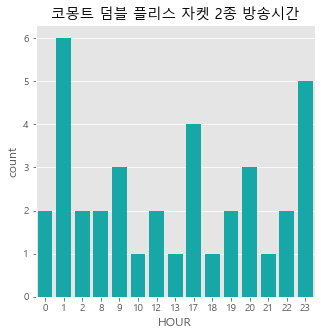

In [72]:
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=플리스_data['HOUR'], data=플리스_data, color="c")
plt.title("코몽트 덤블 플리스 자켓 2종 방송시간")

In [73]:
b = 플리스_data.groupby('HOUR').sum()
b

,exp_min,m_code,p_code,unit_price,total_price,sales,YEAR,MONTH,DAY,MINUTE,SECOND,DAY_NUM,code,temp,no
HOUR,,,,,,,,,,,,,,,
0,40.00000,200836,402644,79800,253354000,6350,4038,24,32,0,0,9,1248,13769,72042
1,111.51667,602508,1207936,279400,414411000,10042,12114,70,58,180,0,20,3744,39492,206381
2,40.00000,200836,402646,99800,65903000,1321,4038,23,23,0,0,5,1248,13051,68206
8,40.00000,200836,402644,79800,161228000,4040,4038,24,14,60,0,12,1248,13396,69997
9,60.00000,301254,603966,119700,223697000,5607,6057,36,51,60,0,20,1872,20674,108045
10,20.00000,100418,201322,39900,69815000,1750,2019,12,22,0,0,7,624,6988,36524
12,40.00000,200836,402644,79800,61264000,1536,4038,24,22,60,0,6,1248,13552,70991
13,20.00000,100418,201322,39900,63142000,1583,2019,12,11,0,0,3,624,6776,35497
17,80.00000,401672,805288,159600,328369000,8229,8076,48,90,120,0,16,2496,28034,146472


Text(0.5, 1.0, '코몽트 덤블 플리스 자켓 2종(합계)')

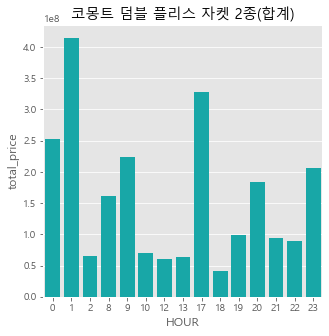

In [74]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y=b['total_price'], x=b.index, color="c")
plt.title("코몽트 덤블 플리스 자켓 2종(합계)")

In [75]:
# 요일

In [76]:
플리스_data.value_counts('DAY_NUM')

DAY_NUM
7    9
2    9
3    6
6    5
4    3
1    3
5    2
dtype: int64

In [77]:
a = 플리스_data.groupby('DAY_NUM').sum()
a

,exp_min,m_code,p_code,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,code,temp,no
DAY_NUM,,,,,,,,,,,,,,,
1,57.16667,301254,603969,149700,65444000,1312,6057,36,6,4,60,0,1872,19869,103791
2,180.00000,903762,1811898,359100,554967000,13908,18171,108,153,156,180,0,5616,62115,324960
3,120.00000,602508,1207932,239400,266569000,6682,12114,72,108,104,120,0,3744,41541,217113
4,57.18333,301254,603969,149700,69139000,1386,6057,33,63,4,60,0,1872,19284,100821
5,37.16667,200836,402644,79800,345731000,8665,4038,24,12,2,60,0,1248,13390,69975
6,100.00000,502090,1006610,199500,546566000,13697,10095,60,63,59,120,0,3120,34054,177972
7,180.00000,903762,1811898,359100,506633000,12698,18171,108,177,135,180,0,5616,62541,327108


Text(0.5, 1.0, '코몽트 덤블 플리스 자켓 2종(합계)')

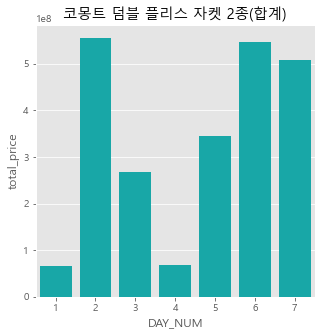

In [78]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y=a['total_price'], x=a.index, color="c")
plt.title("코몽트 덤블 플리스 자켓 2종(합계)")

Text(0.5, 1.0, '코몽트 덤블 플리스 자켓 2종(평균)')

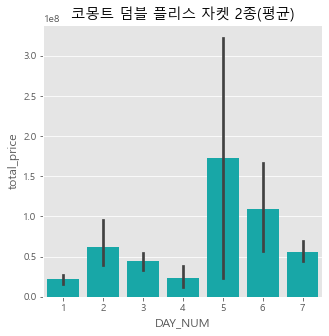

In [79]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y=플리스_data['total_price'], x=플리스_data['DAY_NUM'], data=temp, color="c")
plt.title("코몽트 덤블 플리스 자켓 2종(평균)")

In [80]:
# 금요일 방송 2번밖에 안했지만 한번 대박 한번은 쪽박

In [81]:
# sales-unit_price 분포

In [82]:
의류_data.loc[:, ['m_code', 'p_name', 'unit_price', 'total_price', 'sales']]

,m_code,p_name,unit_price,total_price,sales
0,100346,테이트 남성 셀린니트3종,39900,2099000,53
1,100346,테이트 여성 셀린니트3종,39900,4371000,110
2,100346,테이트 남성 셀린니트3종,39900,3262000,82
3,100346,테이트 여성 셀린니트3종,39900,6955000,174
4,100346,테이트 남성 셀린니트3종,39900,6672000,167
...,...,...,...,...,...
37298,100269,[헤스티지] 레나 폭스퍼후드 덕다운롱코트,299000,59435000,199
37299,100269,[헤스티지] 레나 폭스퍼후드 덕다운롱코트,299000,84192000,282
37330,100356,마르엘라로사티 에코무스탕1종,79000,31983000,405
37331,100356,마르엘라로사티 에코무스탕1종,79000,39434000,499


<AxesSubplot:xlabel='sales', ylabel='unit_price'>

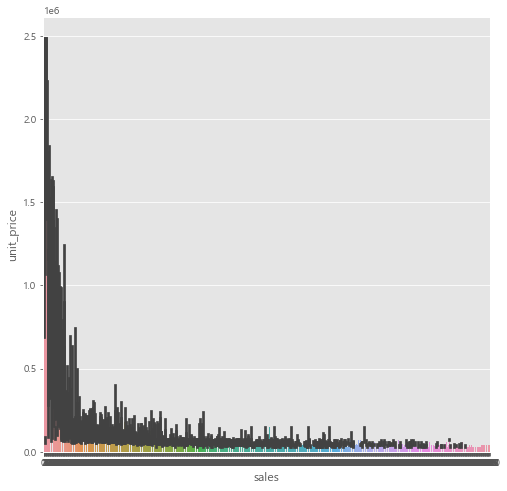

In [258]:
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=의류_data['sales'], y=의류_data['unit_price'])

# Top total_price

In [259]:
prices = 의류_data.sort_values('total_price', ascending=False)[['broadcast', 'exp_min', 'm_code', 'p_name', 'total_price', 'sales', 'brand_name' ]]

In [263]:
prices

,broadcast,exp_min,m_code,p_name,total_price,sales,brand_name
34988,2019-12-06 01:40:00,17.16667,100418,코몽트 덤블 플리스 자켓 2종,322009000,8070,코몽트
36488,2019-12-21 17:40:00,20.00000,100418,코몽트 덤블 플리스 자켓 2종,223492000,5601,코몽트
35458,2019-12-10 00:00:00,20.00000,100418,코몽트 덤블 플리스 자켓 2종,187419000,4697,코몽트
20215,2019-07-13 10:30:00,30.00000,100352,마르엘라로사티 나파 휘메일 풀스킨 밍크하프코트 1종,146042000,86,마르엘라로사티
32166,2019-11-06 00:00:00,20.00000,100340,스튜디오럭스 후드롱구스다운코트,135711000,2300,스튜디오럭스
...,...,...,...,...,...,...,...
26146,2019-09-08 10:00:00,10.00000,100352,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,50000,0,마르엘라로사티
25481,2019-09-01 20:00:00,10.00000,100352,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,50000,0,마르엘라로사티
25103,2019-08-28 12:20:00,10.00000,100352,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,50000,0,마르엘라로사티
23116,2019-08-09 06:20:00,10.00000,100352,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,50000,0,마르엘라로사티


In [262]:
prices[:20].value_counts('brand_name') #sales와 결과 차이 있음!

brand_name
코몽트        7
마르엘라로사티    5
대동모피       5
헤스티지       1
스튜디오럭스     1
CERINI     1
dtype: int64

In [ ]:
#마르엘라로사티

In [265]:
마르엘라로사티_data = 의류_data[의류_data['brand_name'] == '마르엘라로사티']
마르엘라로사티_data.sort_values('total_price', ascending=False)

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,...,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME,DAY_NUM,code,temp,no,brand_name
20215,2019-07-13 10:30:00,30.00000,100352,201125,마르엘라로사티 나파 휘메일 풀스킨 밍크하프코트 1종,의류,1690000,146042000,86,2019,...,10,30,0,2019-07-13,Saturday,6,267,3875,20215,마르엘라로사티
37332,2019-12-31 19:00:00,20.00000,100356,201134,마르엘라로사티 에코무스탕1종,의류,79000,129905000,1644,2019,...,19,0,0,2019-12-31,Tuesday,2,677,7177,37332,마르엘라로사티
21033,2019-07-20 09:40:00,20.00000,100352,201141,마르엘라로사티 휘메일 풀스킨 밍크 후드코트,의류,1590000,129156000,81,2019,...,9,40,0,2019-07-20,Saturday,6,267,4011,21033,마르엘라로사티
19567,2019-07-07 09:40:00,20.00000,100352,201141,마르엘라로사티 휘메일 풀스킨 밍크 후드코트,의류,1590000,117618000,74,2019,...,9,40,0,2019-07-07,Sunday,7,267,3757,19567,마르엘라로사티
21770,2019-07-26 21:40:00,20.00000,100352,201141,마르엘라로사티 휘메일 풀스킨 밍크 후드코트,의류,1590000,105731000,66,2019,...,21,40,0,2019-07-26,Friday,5,267,4145,21770,마르엘라로사티
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,2019-09-08 10:00:00,10.00000,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0,2019,...,10,0,0,2019-09-08,Sunday,7,267,5020,26146,마르엘라로사티
25103,2019-08-28 12:20:00,10.00000,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0,2019,...,12,20,0,2019-08-28,Wednesday,3,267,4798,25103,마르엘라로사티
24448,2019-08-21 10:00:00,10.00000,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0,2019,...,10,0,0,2019-08-21,Wednesday,3,267,4651,24448,마르엘라로사티
24017,2019-08-17 09:00:00,10.00000,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,50000,0,2019,...,9,0,0,2019-08-17,Saturday,6,267,4569,24017,마르엘라로사티


In [ ]:
#대동모피

In [267]:
대동모피_data = 의류_data[의류_data['brand_name'] == '대동모피']
대동모피_data.sort_values('total_price', ascending=False)

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,...,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME,DAY_NUM,code,temp,no,brand_name
36335,2019-12-19 21:00:00,20.00000,100062,200152,대동모피 19 F/W 폭스 베스트,의류,149000,134058000,900,2019,...,21,0,0,2019-12-19,Thursday,4,391,6936,36335,대동모피
34965,2019-12-06 20:00:00,20.00000,100062,200152,대동모피 19 F/W 폭스 베스트,의류,149000,126954000,852,2019,...,20,0,0,2019-12-06,Friday,5,391,6691,34965,대동모피
34964,2019-12-06 19:40:00,20.00000,100062,200152,대동모피 19 F/W 폭스 베스트,의류,149000,114764000,770,2019,...,19,40,0,2019-12-06,Friday,5,391,6691,34964,대동모피
34327,2019-11-30 13:20:00,20.00000,100062,200152,대동모피 19 F/W 폭스 베스트,의류,149000,112427000,755,2019,...,13,20,0,2019-11-30,Saturday,6,391,6575,34327,대동모피
34156,2019-11-28 19:40:00,20.00000,100062,200152,대동모피 19 F/W 폭스 베스트,의류,149000,111990000,752,2019,...,19,40,0,2019-11-28,Thursday,4,391,6546,34156,대동모피
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28060,2019-09-26 10:00:00,10.00000,100063,200153,대동모피 패션밍크 후드 롱코트 (19FW),의류,690000,2297000,3,2019,...,10,0,0,2019-09-26,Thursday,4,486,5374,28060,대동모피
21794,2019-07-27 06:00:00,10.00000,100062,200151,대동모피 19 F/W 폭스 베스트,의류,149000,2208000,15,2019,...,6,0,0,2019-07-27,Saturday,6,391,4149,21794,대동모피
36528,2019-12-22 11:20:00,10.00000,100063,200153,대동모피 패션밍크 후드 롱코트 (19FW),의류,690000,1203000,2,2019,...,11,20,0,2019-12-22,Sunday,7,486,6990,36528,대동모피
26624,2019-09-13 09:00:00,10.00000,100063,200153,대동모피 패션밍크 후드 롱코트 (19FW),의류,690000,1173000,2,2019,...,9,0,0,2019-09-13,Friday,5,486,5114,26624,대동모피


# pipeline

In [28]:
def group_df(group_name):
    return df[df.p_group == group_name]

def box_plot(group_name):
    times = ['MONTH','DAY_NUM','HOUR']
    features = ['total_price','sales','unit_price']
    nrows = ncols = 3  

    fig, axes = plt.subplots(nrows,ncols, figsize = (18,18))

    for row, time in enumerate(times):
        for col ,feature in enumerate(features):

            g = sns.boxplot(x=time, y=feature, data=group_df(group_name), ax=axes[row,col])

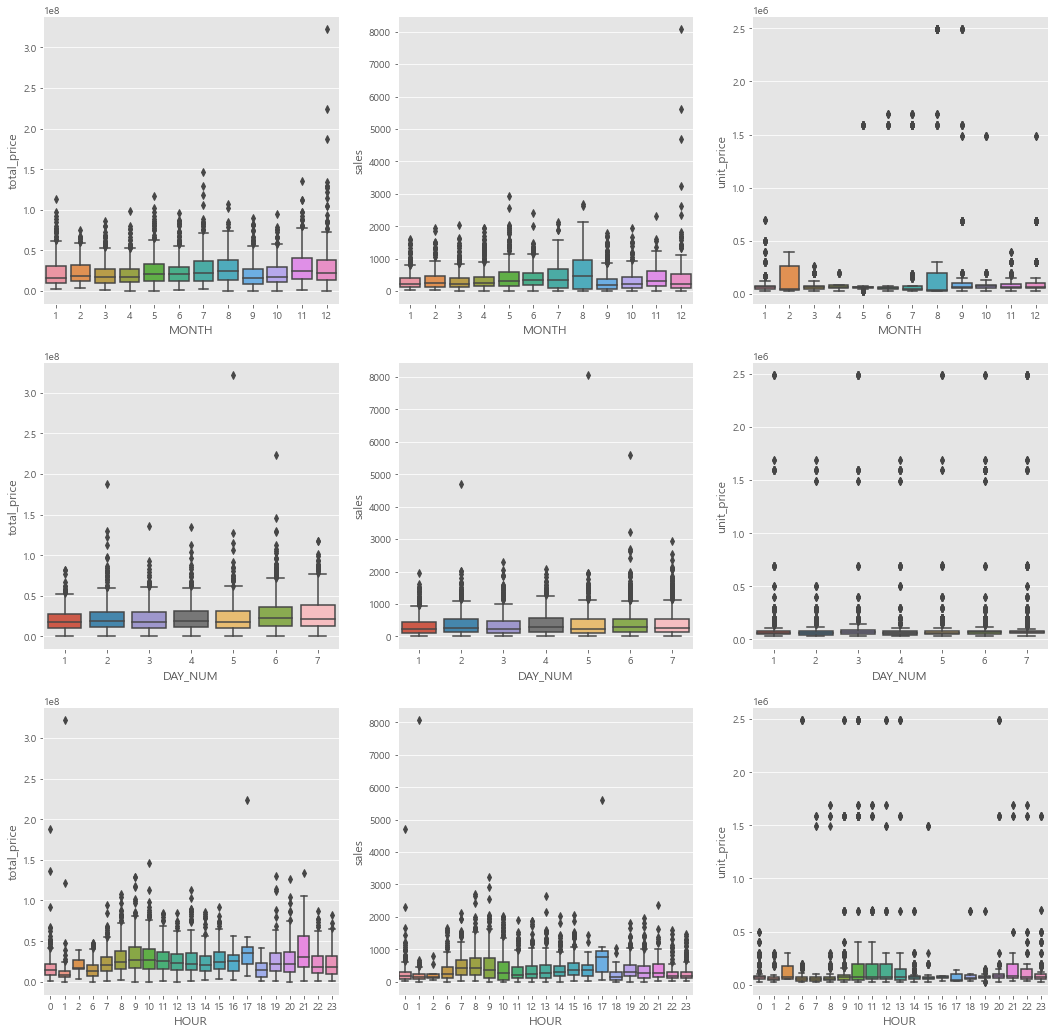

In [53]:
box_plot('의류')

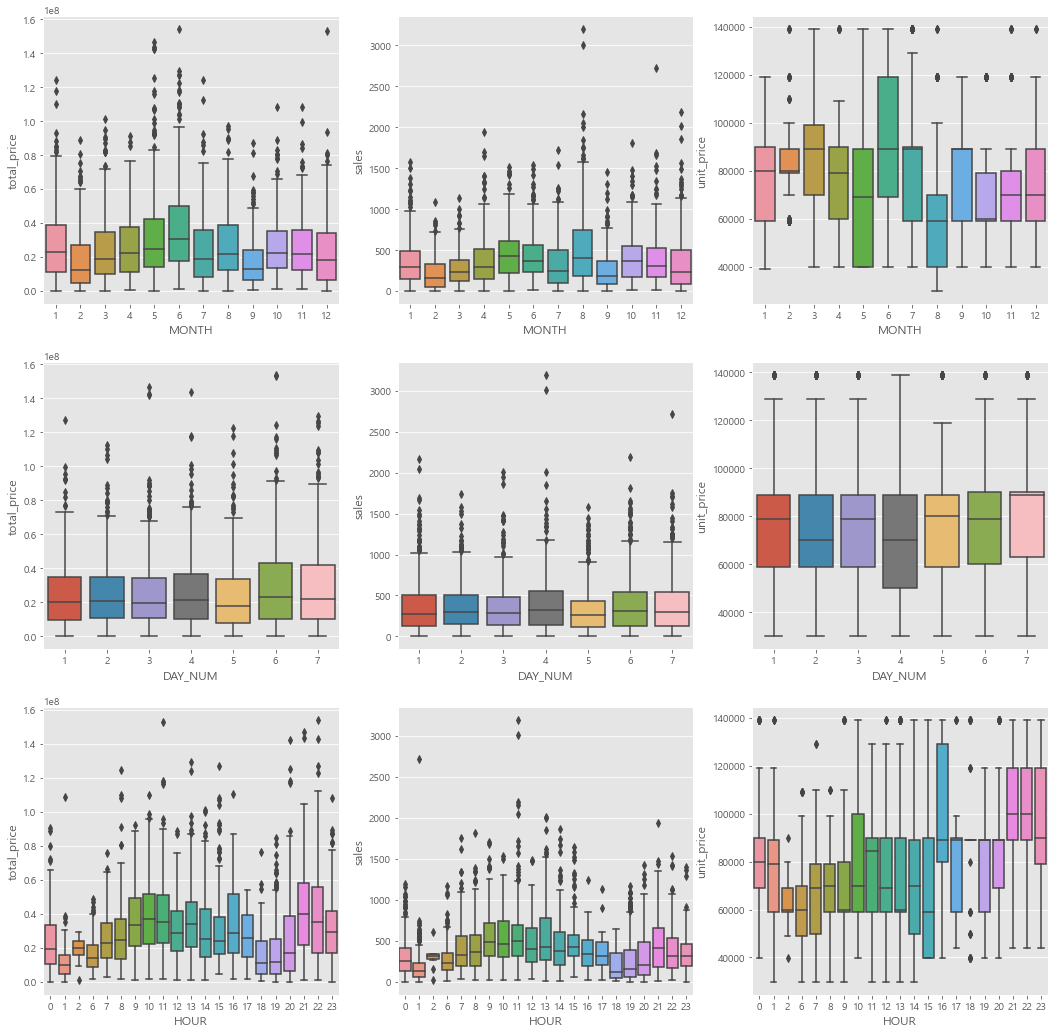

In [29]:
box_plot('속옷')

In [331]:
# 특정 상품군의 월별 unit_price,total_price,sales(mean, sum)
def kinds_sum_mean(form,arg):
    figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
    figure.set_size_inches(20,10)

    m_data_sum = df[df['p_group'] == arg].groupby(form).sum()['unit_price']
    h_data_sum = df[df['p_group'] == arg].groupby(form).sum()['total_price']
    d_data_sum = df[df['p_group'] == arg].groupby(form).sum()['sales']

    m_data_mean = df[df['p_group'] == arg].groupby(form).mean()['unit_price']
    h_data_mean = df[df['p_group'] == arg].groupby(form).mean()['total_price']
    d_data_mean = df[df['p_group'] == arg].groupby(form).mean()['sales']

    sns.pointplot(x = m_data_sum.index, y = m_data_sum.values, ax = ax1)
    sns.pointplot(x = h_data_sum.index, y = h_data_sum.values, ax = ax3)
    sns.barplot(x = d_data_sum.index, y = d_data_sum.values, ax = ax5)
    
    sns.pointplot(x = m_data_mean.index, y = m_data_mean.values, ax = ax2)
    sns.pointplot(x = h_data_mean.index, y = h_data_mean.values, ax = ax4)
    sns.barplot(x = d_data_mean.index, y = d_data_mean.values, ax = ax6)
    
    ax1.set(title='sum')
    ax2.set(title='mean')

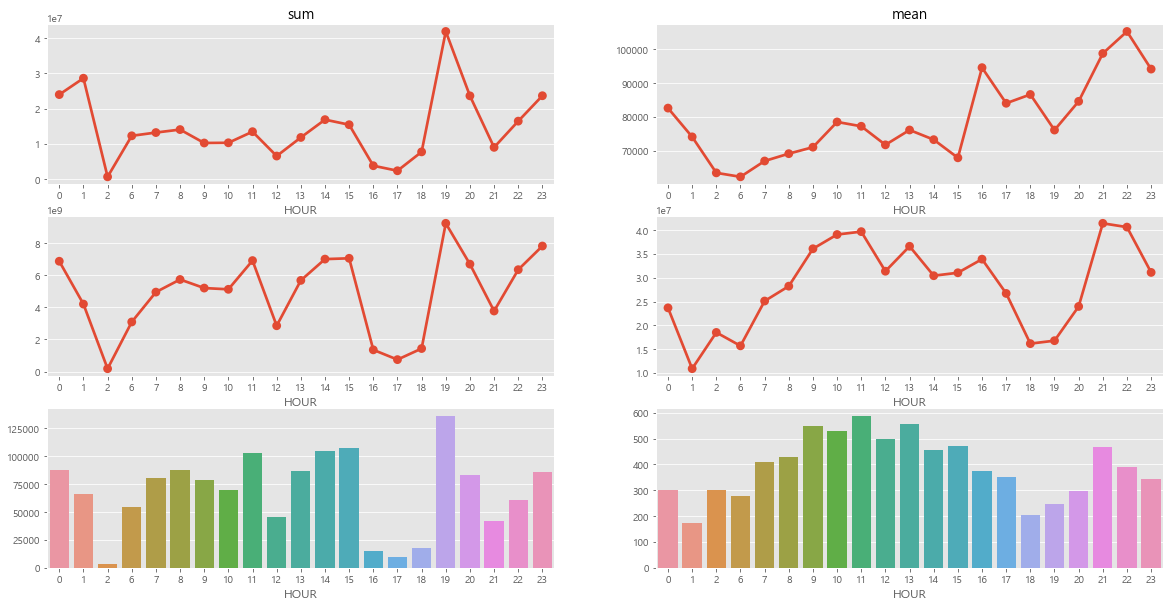

In [39]:
kinds_sum_mean('HOUR','속옷') # MONTH, HOUR, DAY_NAME중 선택

In [333]:
def exp_min_sum(arg):
    figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    figure.set_size_inches(15,5)

    m_data = df[df['p_group'] == arg].groupby('MONTH').sum()['exp_min']
    h_data = df[df['p_group'] == arg].groupby('HOUR').sum()['exp_min']
    d_data = df[df['p_group'] == arg].groupby('DAY_NAME').sum()['exp_min']

    sns.barplot(x = m_data.index, y = m_data.values, ax = ax1)
    sns.barplot(x = h_data.index, y = h_data.values, ax = ax2)
    sns.barplot(x = d_data.index, y = d_data.values, ax = ax3)

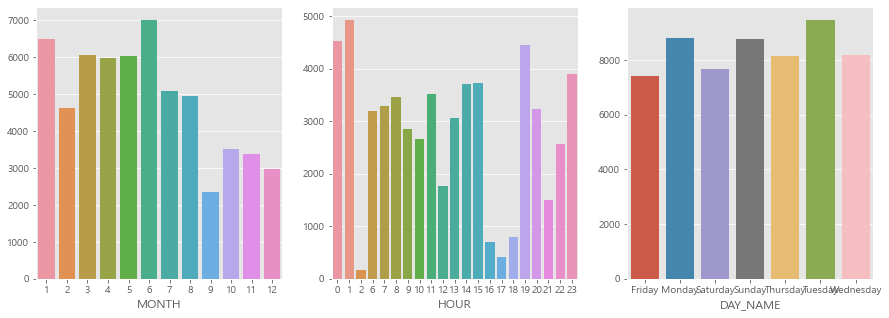

In [334]:
exp_min_sum('속옷')

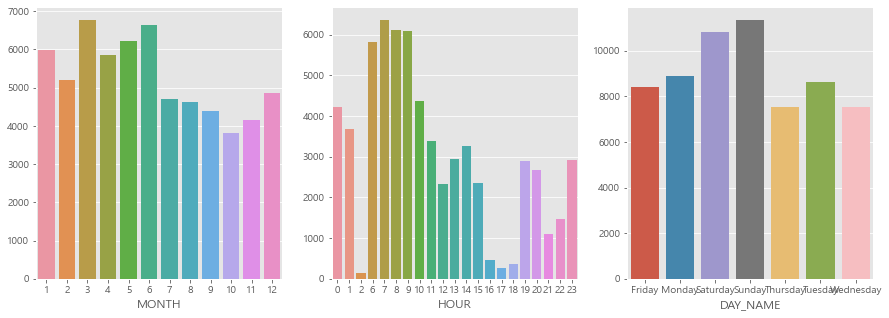

In [335]:
exp_min_sum('의류')